# Advanced Machine Learning Topics

In the previous tutorial we saw the most basic ML algorithms and how they can be used through scikit-learn. However, in order to maximize their potential and achieve better scores we must have a better understanding of several a bit more advanced concepts.

## Bias-Variance tradeoff

Bias-Variance tradeoff is the problem of simultaneously minimizing the error originating from two sources:

- **Bias** is an error caused from false assumptions held by the predictor. High bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**).
- **Variance** occurs when the model is overly-sensitive to small fluctuations in the training set. This can cause an algorithm to model the random noise in the training data, impacting its ability to generalize on unseen data (**overfitting**).

This is referred to as a tradeoff because reducing one of these two error types might raise the other.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We'll try to create a problem where these two errors become apparent.

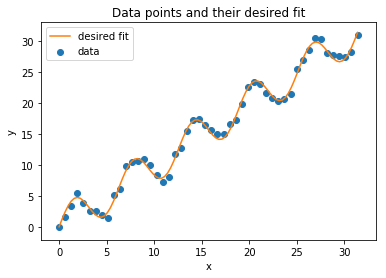

In [2]:
x = np.linspace(0, 10 * np.pi, 50).reshape(-1,1)
y = x + 3 * np.sin(x)
noise = np.random.random(50).reshape(-1,1)
noise -= noise.mean() # center noise at 0
noisy = y + noise * 2

ax = plt.subplot(111)
ax.plot(np.linspace(0, 10 * np.pi, 100), 
        np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
        color='#ff7f0e', label='desired fit')
ax.scatter(x, noisy, label='data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data points and their desired fit')
plt.legend()

To demonstrate the first error category, bias, we'll try to fit a linear regression through this data.

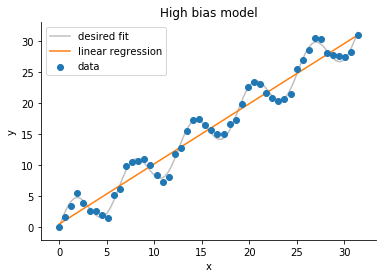

In [3]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x, noisy)
y_lin = lin.predict(x)

ax = plt.subplot(111)
ax.plot(np.linspace(0, 10 * np.pi, 100), 
        np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
        color='gray', label='desired fit', zorder=-1, alpha=0.5)
ax.plot(x, y_lin, color='#ff7f0e', label='linear regression', zorder=-1)
ax.scatter(x, noisy, label='data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('High bias model')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend()

This is an illustration of **high bias** in a model. As stated previously the model, in this case, can't represent some meaningful relations in the data, learning to a prediction that is not as precise as we would have hoped. This is also referred to as **underfitting**.

In this case high bias is attributed to the data violating two of the main assumptions of linear regression (linearity and no autocorrelation). This means that the model we selected is **not complex enough** to sufficiently represent the data. The ability of an algorithm to model the complexity of the data is called its **capacity** and in this case, it is too low.

The two main reasons for high bias are:

- We selected a model with a low capacity.
- We didn't let the model complete its training (we stopped it too soon).

In order to demonstrate the effect of high variance we are going to use a Decision Tree. Decision trees are notorious for overfitting.

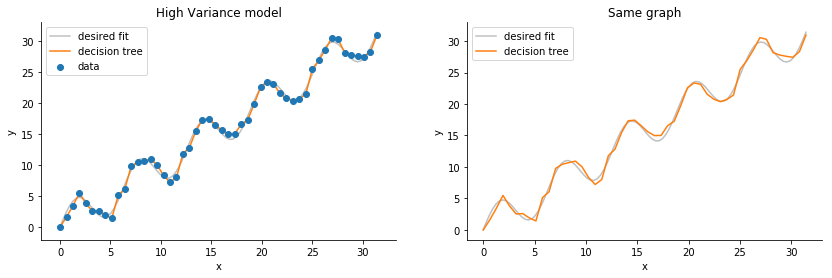

In [4]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x, noisy)
y_dtr = dtr.predict(x)

plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
ax1.plot(np.linspace(0, 10 * np.pi, 100), 
        np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
        color='gray', label='desired fit', zorder=-1, alpha=0.5)
ax1.plot(x, y_dtr, color='#ff7f0e', label='decision tree', zorder=-1)
ax1.scatter(x, noisy, label='data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('High Variance model')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(np.linspace(0, 10 * np.pi, 100), 
        np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
        color='gray', label='desired fit', zorder=-1, alpha=0.5)
ax2.plot(x, y_dtr, color='#ff7f0e', label='decision tree', zorder=-1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Same graph')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax2.legend()

This is the second type of error we discussed previously. The model has learned to represent not only the relationships in the data but also its noise. This is caused because Decision Trees are highly sensitive to the variance of their input. High variance is also called **overfitting**.

While this state will produce an error of 0 on the training set, it will produce a high error on data the model hasn't seen before (i.e. the test set). The model's ability to predict values that it hasn't seen in the training set is referred to as **generalization**. This can be caused if the model has a very high capacity (enough to learn the training data by heart).

Achieving **both** low bias and low variance is possible but difficult to get. 

A practical guide to dealing with this type of issue is:

1. First try to **reduce the bias**. This is done by selecting a model with a **high enough** capacity of modelling the data. You can ensure this by reducing the error on the training set as much as possible. This will produce a high-variance model, but we don't care about it at this point.
2. Then we should **reduce the variance**. The easiest way to do so is to **regularize** the model. Regularization is a technique that puts a constraint on the model during its training phase, so that is isn't so sensitive to the variance of the data. This **will** hurt the model's training performance, but hopefully will also increase its ability to generalize. 
3. If the model is still overfitting, we can try other techniques such as **bagging**, **early stopping** or even **inducing noise to the input**.

## Curse of Dimensionality

With the word dimensions of a dataset, we refer to the number of features in it. More dimensions mean more features, which is a good thing, right? **Not always**! There are various problems arising as the dimensionality of our data increases. The most common problem is associated with the **sparsity** of data in high-dimensional spaces. As the number of dimensions grows, the amount of data we need to generalize accurately grows exponentially. This is illustrated in the figure below:

![curse of dimensionality](https://i.imgur.com/tXjjCsm.png)

Imagine a problem where we have thousands of dimensions. The value added by increasing the dimensions even more would be smaller than the overhead induced in most ML algorithms.

In practise the problems arising from dimensionality come into play in very high-dimensional spaces. The sparsity, of the data in such spaces can be useful as the problems usually **become more separable**, helping ML algorithms. In low-dimensional problems, more dimensions are good (as long as they provide meaningful information).

If we feel that the number of dimensions is hurting our model's performance, we could try performing **dimensionality reduction**.

## Preprocessing (continued)

**Dimensionality reduction** is a preprocessing step and needs to be done before training the algorithm. There are two main ways through we can achieve dimensionality reduction: *feature selection* and *feature extraction*.

### Feature selection

In this preprocessing step, we take a look at our features one by one and we perform several statistical tests each of them in hopes of identifying the features that **carry the most information**. The simplest feature selection technique is the variance threshold. It checks the variance of each feature and removes the ones that are under this threshold. 

In [5]:
# Load a dataset:
from sklearn import datasets
data = datasets.load_breast_cancer()
X = data['data']
y = data['target']

# Add two new features containing the same value (variance=0)
X = np.hstack([X, 
               np.array([5]*X.shape[0]).reshape(-1, 1),   # feature containing only 5s
               np.array([8]*X.shape[0]).reshape(-1, 1)])  # feature containing only 8s

# Apply a variance threshold:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold()
print('original shape:', X.shape)
X = var.fit_transform(X)
print('after applying the threshold:', X.shape)

original shape: (569, 32)
after applying the threshold: (569, 30)


Scikit-learn has many more [feature selectors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) we can use. 

A more advanced technique would be to use a ML algorithm that internally estimates the importance of each feature (e.g. Decision trees calculate the importance of each feature to determine how to split the data). We will look at the case of **L1-regularized linear models**. While we won't cover the theory under them, we will say that they tend to produce **sparse solutions** (i.e. the coefficients of their least important features are zero). We will use this to our advantage.

In [6]:
from sklearn.linear_model import LinearRegression, Lasso

lr = LinearRegression()
lr.fit(X, y)
print('Linear regression coefficients:\n', lr.coef_)

lass = Lasso(alpha=0.01)  # alpha determines the strength of the regularization
                          # the higer the value, the more coefficients will be zero
lass.fit(X, y)
print('\nLasso regression coefficients:\n', lass.coef_)

Linear regression coefficients:
 [ 2.17772056e-01 -4.54546867e-03 -2.37398610e-02 -3.17834750e-04
 -8.46891371e-02  4.22203525e+00 -1.39799728e+00 -2.14183303e+00
 -1.02709200e-01 -3.32616096e-02 -4.34955932e-01  6.75847233e-03
  2.25202577e-02  9.23217886e-04 -1.58543207e+01 -6.49034090e-02
  3.56546799e+00 -1.05679513e+01 -1.69734069e+00  7.14644016e+00
 -1.95183121e-01 -7.15937520e-03  2.43505057e-03  1.01122332e-03
 -5.42856861e-01 -6.71582941e-02 -3.81191215e-01 -4.64309895e-01
 -5.56787546e-01 -4.30348309e+00]

Lasso regression coefficients:
 [ 0.          0.00202185  0.          0.00043358 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.00125443 -0.         -0.         -0.         -0.
 -0.         -0.         -0.08225553 -0.01460497 -0.01379535  0.0007448
 -0.         -0.         -0.06013473 -0.         -0.         -0.        ]


Now lasso has done the feature selection for us, all we have to do is to remove the features with zero coefficients. Scikit-learn gives us a way of easily incorporating models like this for feature selection into our pipeline.

In [7]:
from sklearn.feature_selection import SelectFromModel
lasso_selector = SelectFromModel(lass, prefit=True)  # prefit because we have already trained the model
X_selected = lasso_selector.transform(X)  # plain transform because model is already fit
print('original shape:', X.shape)
print('shape after selection:', X_selected.shape)

original shape: (569, 30)
shape after selection: (569, 8)


We don't have to pre-train the model. We can just write:

```python
lasso_selector = SelectFromModel(Lasso())  # default alpha=1
X_selected = lasso_selector.fit_transform(X, y)  # remember adding both X and y so that lasso can train
```

### Feature extraction

Feature extraction is similar to feature selection in that they are used for dimensionality reduction (the number of features after this step is lower). Feature extraction, however, differs because the features of the new set are **different** than our old ones. The new features are derived from the old ones and hopefully will be of better quality than the old ones. Feature extraction is necessary in domains where we work with unstructured data (e.g. images, text) which tend to be very high-dimensional. Some feature extraction techniques, however, may be also useful for structured data.

One of the best known feature extraction techniques is [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA). PCA is a linear transformation algorithm that decomposes our features into a new set of features *principal components*. These are orthogonal and **linearly uncorrelated**. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible). We can reconstruct the original data if we have all derived components. However, if we attempt to reconstruct the data through the first $m < n$ components we will have the **best reconstruction possible** (that accounts for most of the variability in the data).

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # we want to keep the 5 first components

X_decomposed = pca.fit_transform(X)

print('original shape:', X.shape)
print('shape after extraction:', X_decomposed.shape)

original shape: (569, 30)
shape after extraction: (569, 5)


### Imputing

An important part of preprocessing is how we handle missing values. We saw a few techniques on how to fill missing data in two previous tutorials (numpy and pandas). Here we will take it one step further through scikit-learn.

The easiest way of imputing missing data is with the mean or median of the feature in the case of continuous values or the most frequent value in the case of categorical ones. Scikit-learn has a transformer that does exactly that, which we can incorporate into our pipeline.

```python
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')  # fill missing values with the feature's mean
imp = Imputer(strategy='median')  # fill missing values with the feature's median
imp = Imputer(strategy='most_frequent')  # fill missing values with the feature's most frequent element
```

A more advanced thought however would be to impute each missing value **depending on the values of the other features** of that example. This would be done by fitting a multivariate regression, where the target would be the feature we want to impute and the training data would be the rest features. If there are missing values in the rest of the features they will be filled with their feature's mean. Once the regression is complete, another feature will be selected as the target and so on...

Scikit-learn will add an Imputer, called [MICEImputer](http://scikit-learn.org/dev/modules/generated/sklearn.impute.MICEImputer.html#sklearn.impute.MICEImputer) doing just this in version 0.20 (still under development at the time of writing this):

```python
from sklearn.impute import MICEImputer
imp = MICEImputer()
```

Let's see an example of the Imputers in action.

In [9]:
# create a copy of the feature array to fill with missing values
X_missing = X.copy()

# Purpusefully replace 100 values at random with np.nan
X_missing[np.random.randint(1, X.shape[0], size=100), np.random.randint(1, X.shape[1], size=100)] = np.nan

# Print first row values
print('First Row (actual values):\n', [round(x, 2) for x in X[0, :]])

# Also replace the whole first row with np.nan
X_missing[0, :] = np.nan
print('\nFirst Row (filled with NaN):\n', X_missing[0, :])

print('\nFeature statistics:')
print('mean:\n', [round(x, 2) for x in np.nanmean(X_missing, axis=0)])
print('median:\n', [round(x, 2) for x in np.nanmedian(X_missing, axis=0)])

# First create two simple imputers and use them to fill nan values 
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy='mean')
median_imputer = Imputer(strategy='median')

X_mean = mean_imputer.fit_transform(X_missing)
X_median = median_imputer.fit_transform(X_missing)

print('\nSimple Imputers:')
print('Row imputed with mean:\n', [round(x, 2) for x in X_mean[0, :]])
print('Row imputed with median:\n', [round(x, 2) for x in X_median[0, :]])

First Row (actual values):
 [17.99, 10.38, 122.8, 1001.0, 0.12, 0.28, 0.3, 0.15, 0.24, 0.08, 1.1, 0.91, 8.59, 153.4, 0.01, 0.05, 0.05, 0.02, 0.03, 0.01, 25.38, 17.33, 184.6, 2019.0, 0.16, 0.67, 0.71, 0.27, 0.46, 0.12]

First Row (filled with NaN):
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]

Feature statistics:
mean:
 [14.12, 19.31, 91.94, 654.49, 0.1, 0.1, 0.09, 0.05, 0.18, 0.06, 0.4, 1.22, 2.85, 40.07, 0.01, 0.03, 0.03, 0.01, 0.02, 0.0, 16.25, 25.69, 107.14, 879.66, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08]
median:
 [13.36, 18.87, 86.24, 546.35, 0.1, 0.09, 0.06, 0.03, 0.18, 0.06, 0.32, 1.11, 2.28, 24.48, 0.01, 0.02, 0.03, 0.01, 0.02, 0.0, 14.96, 25.42, 97.65, 685.55, 0.13, 0.21, 0.23, 0.1, 0.28, 0.08]

Simple Imputers:
Row imputed with mean:
 [14.12, 19.31, 91.94, 654.49, 0.1, 0.1, 0.09, 0.05, 0.18, 0.06, 0.4, 1.22, 2.85, 40.07, 0.01, 0.03, 0.03, 0.01, 0.02, 0.0, 16.25, 25.69, 107.14, 879.66, 0.13, 0.25, 0.27, 

## Imbalance

Until now, all preprocessing steps we've looked at focus on the data's features. Now we'll take a look at the **distribution of classes in the labels**. Imagine having a binary classification dataset, where 90% of the examples are for class 0 and only 10% for class 1. A dummy classifier that just predicted the class 0 would achieve an accuracy of 90% in this dataset. Clearly accuracy is **not** a good choice when dealing with imbalanced problems.

### Confusion matrix metrics 

In order to measure the performance of classifiers, in imbalanced problems we need to look at each class separately. We are going to define four metrics for each class. For any given class $c$:

- **True Positive** (TP): is an example that the classifier **correctly** predicted belongs to class $c$.
- **False Positive** (FP): is an example that the classifier **wrongly** predicted belongs to class $c$. Also referred to as type I error.
- **True Negative** (TN): is an example that the classifier **correctly** predicted does **not** belong to class $c$.
- **False Negative** (FN): is an example that the classifier **wrongly** predicted does **not** to class $c$. Also referred to as type II error.

These can be summed up into a so-called **confusion matrix**:

$$
\begin{array}{c|c|c}
 &Actual \; positive & Actual \; negative \\ \hline
Predicted \; positive & TP & FP \\
Predicted \; negative & FN & TN \\
\end{array}
$$

Depending on which combination of the above we wish to minimize there are several metrics that aggregate them ([sensitivity and specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity), [positive and negative predicted values](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values), [false discovery rate](https://en.wikipedia.org/wiki/False_discovery_rate), etc.). We will examine the two most common used in information theory:

- **Precision**: The amount of examples of class $c$ **we got right** over the total number of examples **we predicted** were of class $c$.

$$ TP \over {TP+FP} $$

- **Recall**: The amount of examples of class $c$ **we got right** over the **total number of class $\mathbf c$ instances** there were.

$$ TP \over {TP+FN} $$

In order to obtain a single value indicating the performance of the classifier on class $c$, we usually take the harmonic mean of the above two, or the [f1-score](https://en.wikipedia.org/wiki/F1_score) as its called.

$$ F_1 = 2 \frac{precision \cdot recall}{precision + recall} $$

Finally, in order to produce a single value of the $F_1$ scores for all classes there are three main ways *weighted*, *micro* averaging and *macro* averaging. We won't go into detail for the two, just note that the second **won't** take class imbalance into account (it will average the precision and recall for each class, not taking into account how many samples each class has).

In [10]:
_, c = np.unique(y, return_counts=True)
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100))
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

class 0: 37.26% of total samples
class 1: 62.74% of total samples


Our dataset is fairly imbalanced.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4)
knn = KNeighborsClassifier()
knn.fit(X_tr, y_tr)
preds = knn.predict(X_ts)
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))
print('\nClassification Report:')
print(classification_report(y_ts, preds))

accuracy: 95.18%

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.90      0.93        80
          1       0.95      0.98      0.96       148

avg / total       0.95      0.95      0.95       228



If we want to change the averaging method (let's use macro averaging):

In [12]:
p, r, f1, s = precision_recall_fscore_support(y_ts, preds, average='macro')
print('Precision: {:.2f}%'.format(p*100))
print('Recall:    {:.2f}%'.format(r*100))
print('F1-score:  {:.2f}%'.format(f1*100))

Precision: 95.39%
Recall:    93.99%
F1-score:  94.62%


While these metrics will give us a better estimate on how our model is performing in imbalanced problems, how can we actually improve its performance?

There are two main ways we can attempt: **sampling** our data and using a classifier that supports **class weights**.

### Over/Under sampling

Sampling our data is a **preprocessing** step where we either **create** more training examples for our under-represented classes (**over-sampling**) or **throw** away some examples from our over-represented classes (**under-sampling**). There are several techniques on how to do so. 

A helpful library containing many sampling algorithms is [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html) or imblearn.

We'll see an example of a random over-sampler and a random under-sampler. These throw away examples at random. 

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
X_over, y_over = ros.fit_sample(X_tr, y_tr)

rus = RandomUnderSampler()
X_under, y_under = rus.fit_sample(X_tr, y_tr)

print('Original dataset:')
_, c = np.unique(y_tr, return_counts=True)
print('Total number of examples:', len(y_tr))
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100))
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

print('\nOversampled dataset:')
_, c = np.unique(y_over, return_counts=True)
print('Total number of examples:', len(y_over))
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100))
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

print('\nUndersampled dataset:')
_, c = np.unique(y_under, return_counts=True)
print('Total number of examples:', len(y_under))
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100))
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

Original dataset:
Total number of examples: 341
class 0: 38.71% of total samples
class 1: 61.29% of total samples

Oversampled dataset:
Total number of examples: 418
class 0: 50.00% of total samples
class 1: 50.00% of total samples

Undersampled dataset:
Total number of examples: 264
class 0: 50.00% of total samples
class 1: 50.00% of total samples


There are many **more sophisticated** sampling algorithms in imblearn. That usually perform better than their random counterparts. Also, as a rule of the thumb over-sampling usually works **better** than under-sampling because almost always ML algorithms benefit from more data. However, this might cause your models to **overfit** on the under-represented classes. 

## Cross-validation

Another very important technique to use when training ML algorithms is **cross-validation**. This technique causes the models to be less sensitive to the initial random train-test split and produces a more unbiased estimate of the algorithm's performance.

So, how does it work?  
First, we need to select a **number of folds** (let's say $5$). This technique will split the original data into $5$ parts and train the model $5$ times, each using a different part as the test set and the remaining $4$ as the training set. When completing the training of all $5$ classifiers, it will average the $5$ scores produced on the $5$ different test sets.

![](https://i.stack.imgur.com/1fXzJ.png)

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('Accuracy for each fold:', scores)
print('Mean accuracy: {:.2f}%'.format(scores.mean()*100))

Accuracy for each fold: [0.88695652 0.93913043 0.9380531  0.94690265 0.92920354]
Mean accuracy: 92.80%


## Cross-validation or test set?

As stated previously, complex models will tend to memorize the training set. This is why we need another set (with different examples than the ones the model was trained on) to evaluate the model. A typical ML workflow includes training a model multiple times, evaluate the model on unseen data and choosing the hyperparameters according to the results of this evaluation.
However, this might cause the model to **overfit on the test set**! The choices of hyperparameters we made, are a direct result of the examples contained in the test set.

To deal with this we need to either have 3 sets:

- A **training set** to train the model on.
- A **validation set** to evaluate our model and help us with the hyperparameter tuning.
- A **test set** to use for the final evaluation of the model.

If we want to use cross-validation we **don't** need the validation set. But it is still **strongly advised** to have a test set for the reasons stated above. In this case we should:

1. **Split** the data into a train-test set.
2. Train and evaluate our models on the training set using **cross-validation**.
3. Perform our final assessment of the model's performance on the **test set**.

## Complete ML workflow for supervised problems

We can combine all we've seen up till now to produce a complete workflow for supervised ML problems.

<img src="https://github.com/rasbt/pattern_classification/raw/master/Images/supervised_learning_flowchart.png" width="65%">

Scikit-learn pipelines and grid search make our life easier because we can optimize **several** steps in the whole workflow, in a non-greedy like manner.

**Note**: If we want to put a sampler from imblearn into our pipeline we **must** use ` imblearn.pipeline.Pipeline` which extends sklearn's pipeline.

In [15]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[('selector', VarianceThreshold()),
                       ('scaler', StandardScaler()),
                       ('sampler', SMOTE()),
                       ('pca', PCA()),
                       ('knn', KNeighborsClassifier())])

param_grid = {'selector__threshold': [0.0, 0.005],
              'pca__n_components': [5, 15],
              'knn__n_neighbors': [3, 5, 7, 9]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_tr, y_tr)
grid.best_estimator_

Pipeline(memory=None,
     steps=[('selector', VarianceThreshold(threshold=0.0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('pca', PCA(...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

### Tips for using grid search:

1. Always **calculate** the number of times a model is fit. In the example above we check for $2 \cdot 2 \cdot 4 = 16$ different hyperparameter combinations. Because we are using a 5-fold cross validation, each combination is used for 5 separate model fits. So the above grid search accounts for 80 different fits! It is very easy when using a grid search for this number to go up to the thousands which would take a **long time to complete**. If we were using a feature selection or imputing through a model, we would need to take that into account too!

2. Instead of checking all different parameter combinations which would be computationally impossible to achieve, we could use a more **progressive** grid search! Imagine we want to optimize a hyperparameter `x` that ranges from $1$ to $1000$:
 - First perform a grid search on `[1, 5, 10, 50, 100, 500, 1000]` (or even more sparse if it takes too long). We get the best performance for $x = 500$.
 - Now perform a grid search on `[200, 350, 500, 650, 800] `. The best performance is produced with $x=800$.
 - Choose an even more close grid `[725, 730, 735, 740, 745, 750]`.
 - Repeat until you achieve the desired precision.

3. `GridSearchCV` has a parameter called `n_jobs`. This can determine the number of jobs to run in parallel. This can increase computation time.